**Realizado por: David Garzón Ramírez y Mariana Fernández Prieto**

## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)


In [2]:
#Importando librerías
import numpy as np
import math as mt
import matplotlib.pylab as plt

In [38]:
#(a)Cálculo de Sn1

# Definición de las series como funciones
def Sn1(n):
  suma = 0
  for i in range(1,n):
    num = ((-1)**i)*i   #num = numerador de la sumatoria
    den = (i+1)         #den = denominador de la sumatoria
    suma += num/den
  return suma

#(a)Cálculo de Sn2
def Sn2(n):
  suma1 = 0
  suma2 = 0
  for i in range (1,n): # Cálculo en una misma función de las dos series que componen la serie 2 
    num1 = -(2*i-1)
    den1 = (2*i)
    num2 = 2 * i
    den2 = 2 * i + 1
    suma1 += num1/den1
    suma2 += num2/den2
  suma = suma1 + suma2
  return suma

#(a) Cálculo de Sn3
def Sn3(n):
  suma = 0
  for i in range(1,n):
    suma += 1 / (2*i*(2*i+1))
  return suma

No handles with labels found to put in legend.


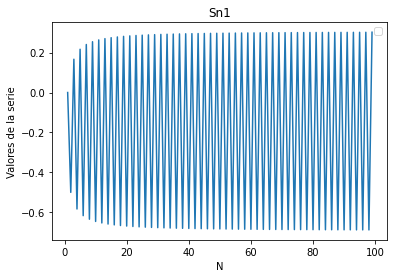

La serie 1 diverge


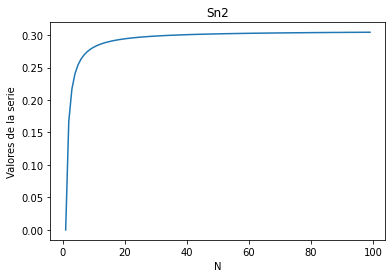

La serie 2 converge


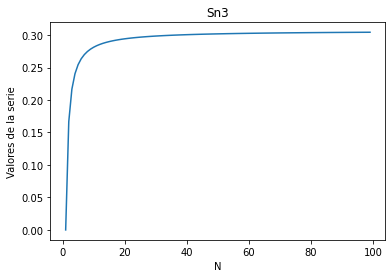

La serie 3 converge


In [47]:
# Código para estudiar la convergencia de las 3 sumatorias

# Definición del arreglo para evaluar los 100 primeros valores de las series
N = 100
Nesimo = np.arange(1,N,1)

# Valores que adquieren las series hasta tal n-ésimo término
s1 = []
for i in Nesimo:
  val1 = Sn1(i)
  s1.append(val1)

s2 = []
for i in Nesimo:
  val2 = Sn2(i)
  s2.append(val2)

s3 = []
for i in Nesimo:
  val3 = Sn3(i)
  s3.append(val3)

# Gráficos de las series

plt.figure()
plt.plot(Nesimo,s1) #Genera gráficas mediante la librería de Matplotlib
plt.title("Sn1")
plt.xlabel("N")   # Nombre del eje x
plt.ylabel("Valores de la serie")  # Nombre del eje y
plt.show()
print("La serie 1 diverge")


plt.figure()
plt.plot(Nesimo,s2) #Genera gráficas mediante la librería de Matplotlib
plt.title("Sn2")
plt.xlabel("N")  # Nombre del eje x
plt.ylabel("Valores de la serie")  # Nombre del eje y
plt.show()
print("La serie 2 converge")


plt.figure()
plt.plot(Nesimo,s3) #Genera gráficas mediante la librería de Matplotlib
plt.title("Sn3")
plt.xlabel("N")  # Nombre del eje x
plt.ylabel("Valores de la serie")  # Nombre del eje y
plt.show()
print("La serie 3 converge")

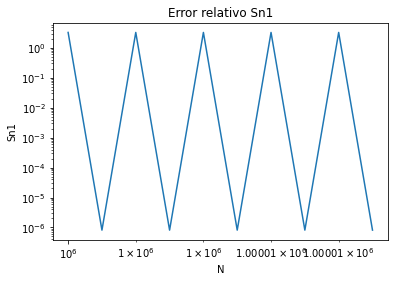

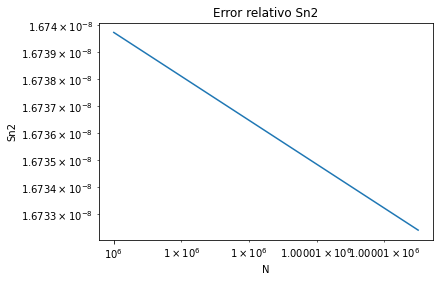

In [48]:
#El código permite representar el error relativo en función del número de términos de las series

# Arreglo de los valores del error en escala logarítmica
intervalo = np.arange(1000000,1000010,1)

# Cálculo del error relativo para las series 1 y 2 con respecto a la 3
Error13 = []
for i in intervalo:
  E13 = np.fabs(Sn1(i)-Sn3(i))/Sn3(i)
  Error13.append(E13)

Error23 = []
for i in intervalo:
  E23 = np.fabs(Sn2(i)-Sn3(i))/Sn3(i)
  Error23.append(E23)

# Gráficos en el intervalo de los errores relativos
plt.figure()
plt.title("Error relativo Sn1")
plt.loglog(intervalo,Error13)
plt.xlabel("N")
plt.ylabel("Sn1")
plt.show()

plt.figure()
plt.title("Error relativo Sn2")
plt.loglog(intervalo,Error23)
plt.xlabel("N")
plt.ylabel("Sn2")
plt.show()

## **Errores de redondeo**. Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logistico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.


> ### Problema: 
Encontrar tres formas diferentes de expresar $f(x)$  y calcular la evolución de la misma condición inicial después de cientos de iteraciones. Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 


>#### Hint: valores numéricos de r y x0 que puede tomar:


```python
    >>> r = [1.9, 2.9, 3.1, 3.5, 3.9]

    >>> x0 = 0.6 # any number in [0,1] will do here

    >>> numpoints = 100
       ```
       

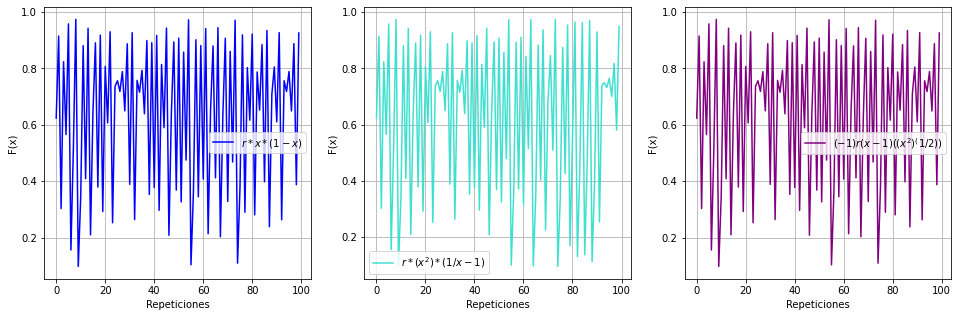

In [24]:
#Defino las variables
size =10
xi = 0.2
r  = 3.9
repeticiones = 100 

#Arreglo para evitar errores de dimensión
Nrep = np.arange(0, repeticiones, 1)

#Funciones distintas para expresar f(x) de 3 formas distintas y comparar
def f1(x, r):#función de población original
  y = r * x * (1-x)
  return y

def f2(x, r):#función de población dividiendo entre x y luego multiplicando por x
  y = r * (x**2) * (1/x - 1)
  return y

def f3(x, r):#función de población utilizando raiz
  y = (-1)*np.sqrt(x**2)*r*(x-1)
  return y

#Función para las gráficas
def graficas(xi, r, repeticiones,Funcion):
  f = Funcion
  ejey = np.zeros(repeticiones)
  for i in range(0, repeticiones):
    xn = f(xi, r)
    xi = xn
    ejey[i] = xn
  return ejey 


#Gráfico de la función 1 
plt.figure(figsize=(22,5))
y1 = graficas(xi, r, repeticiones,f1)
plt.subplot(141)
plt.xlabel("Repeticiones", fontsize=size)
plt.ylabel("F(x)")
plt.grid()
plt.plot(Nrep, y1, color = 'blue', label = '$r*x*(1-x)$') 
plt.legend()


#Gráfico de la función 2
y2 = graficas(xi, r, repeticiones,f2)
plt.subplot(142)
plt.xlabel("Repeticiones", fontsize=size)
plt.ylabel("F(x)")
plt.grid()
plt.plot(Nrep, y2,color = 'turquoise', label = '$r*(x^2)*(1/x - 1)$') 
plt.legend()


#Gráfico de la función 3 
y3 = graficas(xi, r, repeticiones,f3)
plt.subplot(143)
plt.xlabel("Repeticiones", fontsize=size)
plt.ylabel("F(x)")
plt.grid()
plt.plot(Nrep, y3,color = 'purple',label = '$(-1)r(x-1)((x^2)^(1/2))$') 
plt.legend()



